# Statistics of the Character Table of Symmetric Groups $S_n$

In this Jupyter Notebook, we aim to study some properties of the character table of the symmetric group $S_n$.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
import frobenius as fb
import murnaghan_nakayama as mn

/var/folders/mq/tsw4y0l946gbdryxsjh088p80000gn/T/ipykernel_21462/1523558316.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
def heatmap(n, character_table, partition_list):
    def exp_label(partition):
        res = "("
        for key in partition[0:len(partition)-1]:
            res += "{},".format(key)
        res += "{})".format(partition[len(partition) - 1])
        return res

    ylabel = [exp_label(partition) for partition in partition_list]
    xlabel = [ylabel[i] for i in range(len(ylabel)-1, -1, -1)]

    fig, ax = plt.subplots(figsize=(20, 8))
    im = ax.imshow(character_table)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(xlabel)), labels=xlabel)
    ax.set_yticks(np.arange(len(ylabel)), labels=ylabel)
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(xlabel)):
        for j in range(len(ylabel)):
            text = ax.text(j, i, character_table[i][j],
                           ha="center", va="center", color="w")

    ax.set_title("Character Table of S_{}".format(n))
    fig.tight_layout()
    plt.show()


def heatmap_wo_first_col(character_table):
    pass

## Frobenius Formula

In [ ]:
n_fb = 6
partition_list = fb.convert_dict_partitions_to_list(n_fb)
character_table = fb.get_character_table(n_fb)
heatmap(n_fb, character_table, partition_list)

## Murnaghan-Nakayama Rule

In [ ]:
n_mn = 6
partition_list = fb.convert_dict_partitions_to_list(n_mn)   # TODO: make this util function
character_table = mn.get_character_table(n_mn, memo_file_name="")
heatmap(n_mn, character_table, partition_list)

## Other Code

Now we study some character tables with bigger sizes.

Modify the following macros to change the size of the character table as well as the threshold for the heatmap.

Since the value for some entries are too big, in order to make the color look proportional, we can truncate the value and set up a threshold for the heatmap

In [8]:
SIZE = 15  # char table size
# the maximum is THRESHOLD, the minimum is -THRESHOLD
THRESHOLD = 5

Files required:
- char_{N}.csv

[[  1   1   1 ...   1   1   1]
 [ 14  12  10 ...  -1   0  -1]
 [ 90  66  46 ...   1  -1   0]
 ...
 [ 90 -66  46 ...  -1   1   0]
 [ 14 -12  10 ...   1   0  -1]
 [  1  -1   1 ...  -1  -1   1]]


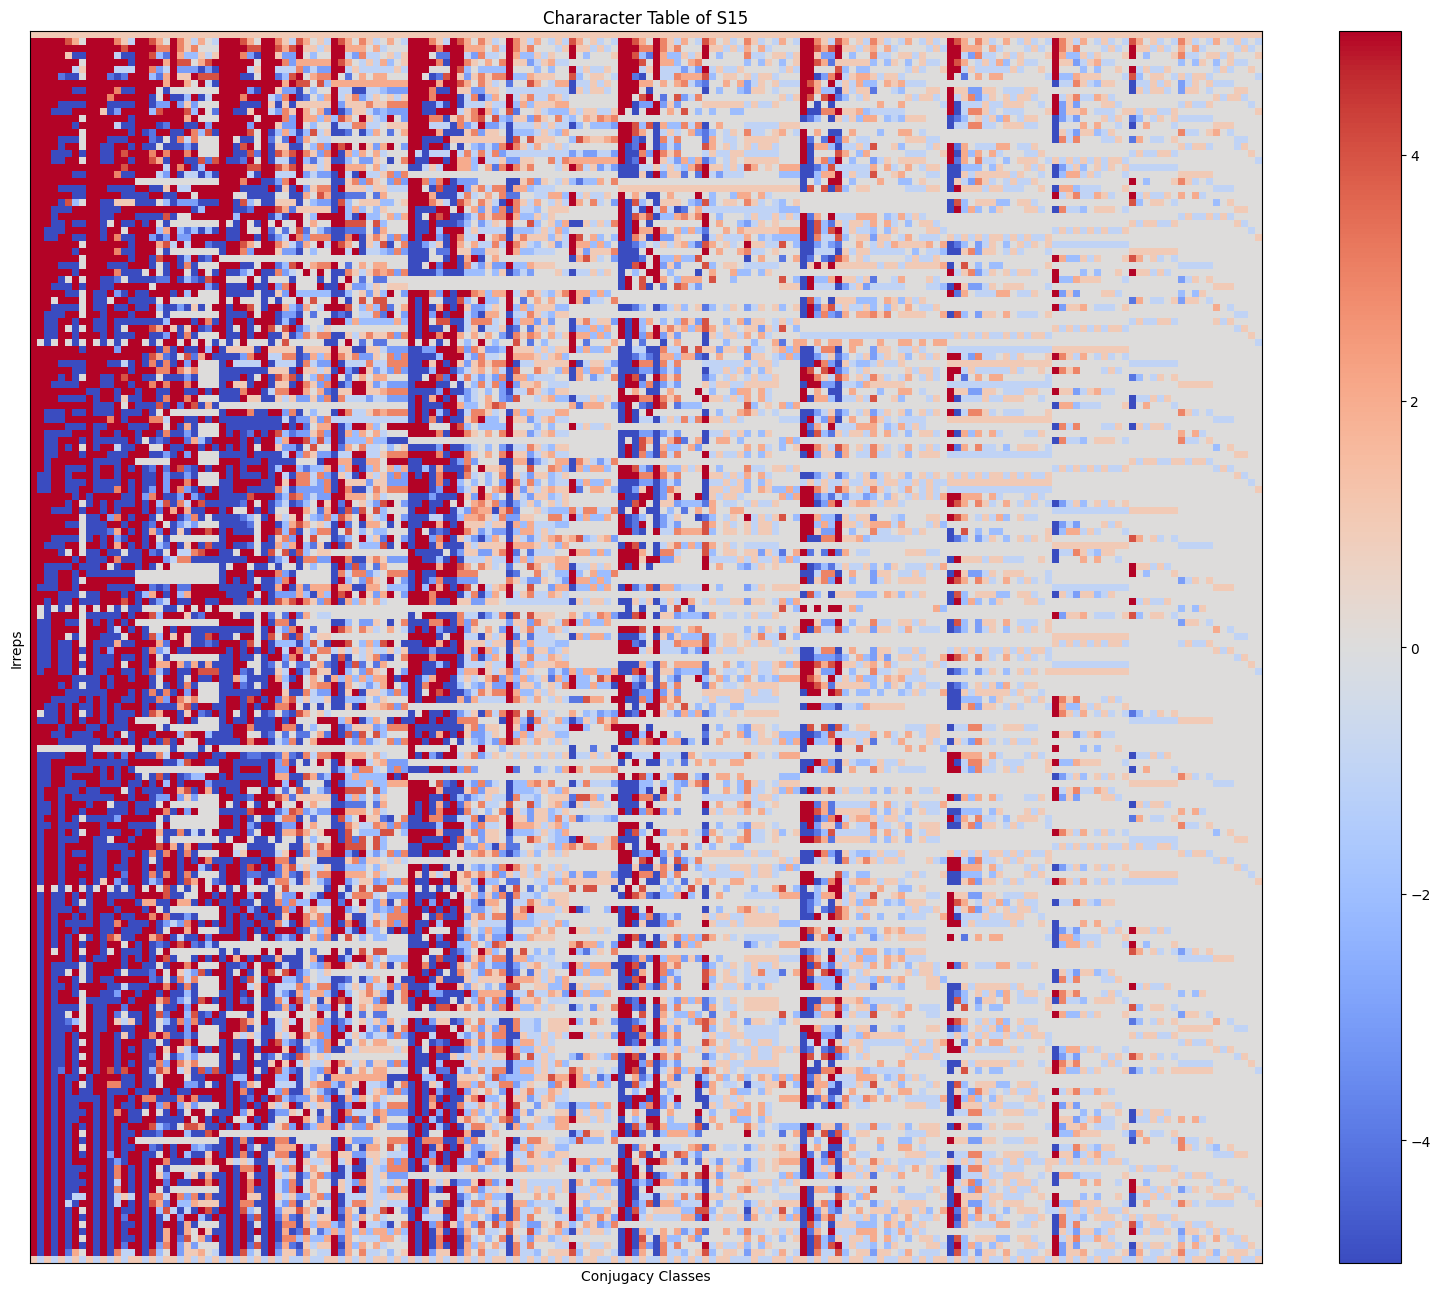

/var/folders/mq/tsw4y0l946gbdryxsjh088p80000gn/T/ipykernel_21462/2305667613.py:29: RuntimeWarning: divide by zero encountered in log
  data_array = np.log(abs(data_array)) / np.log(log_base)


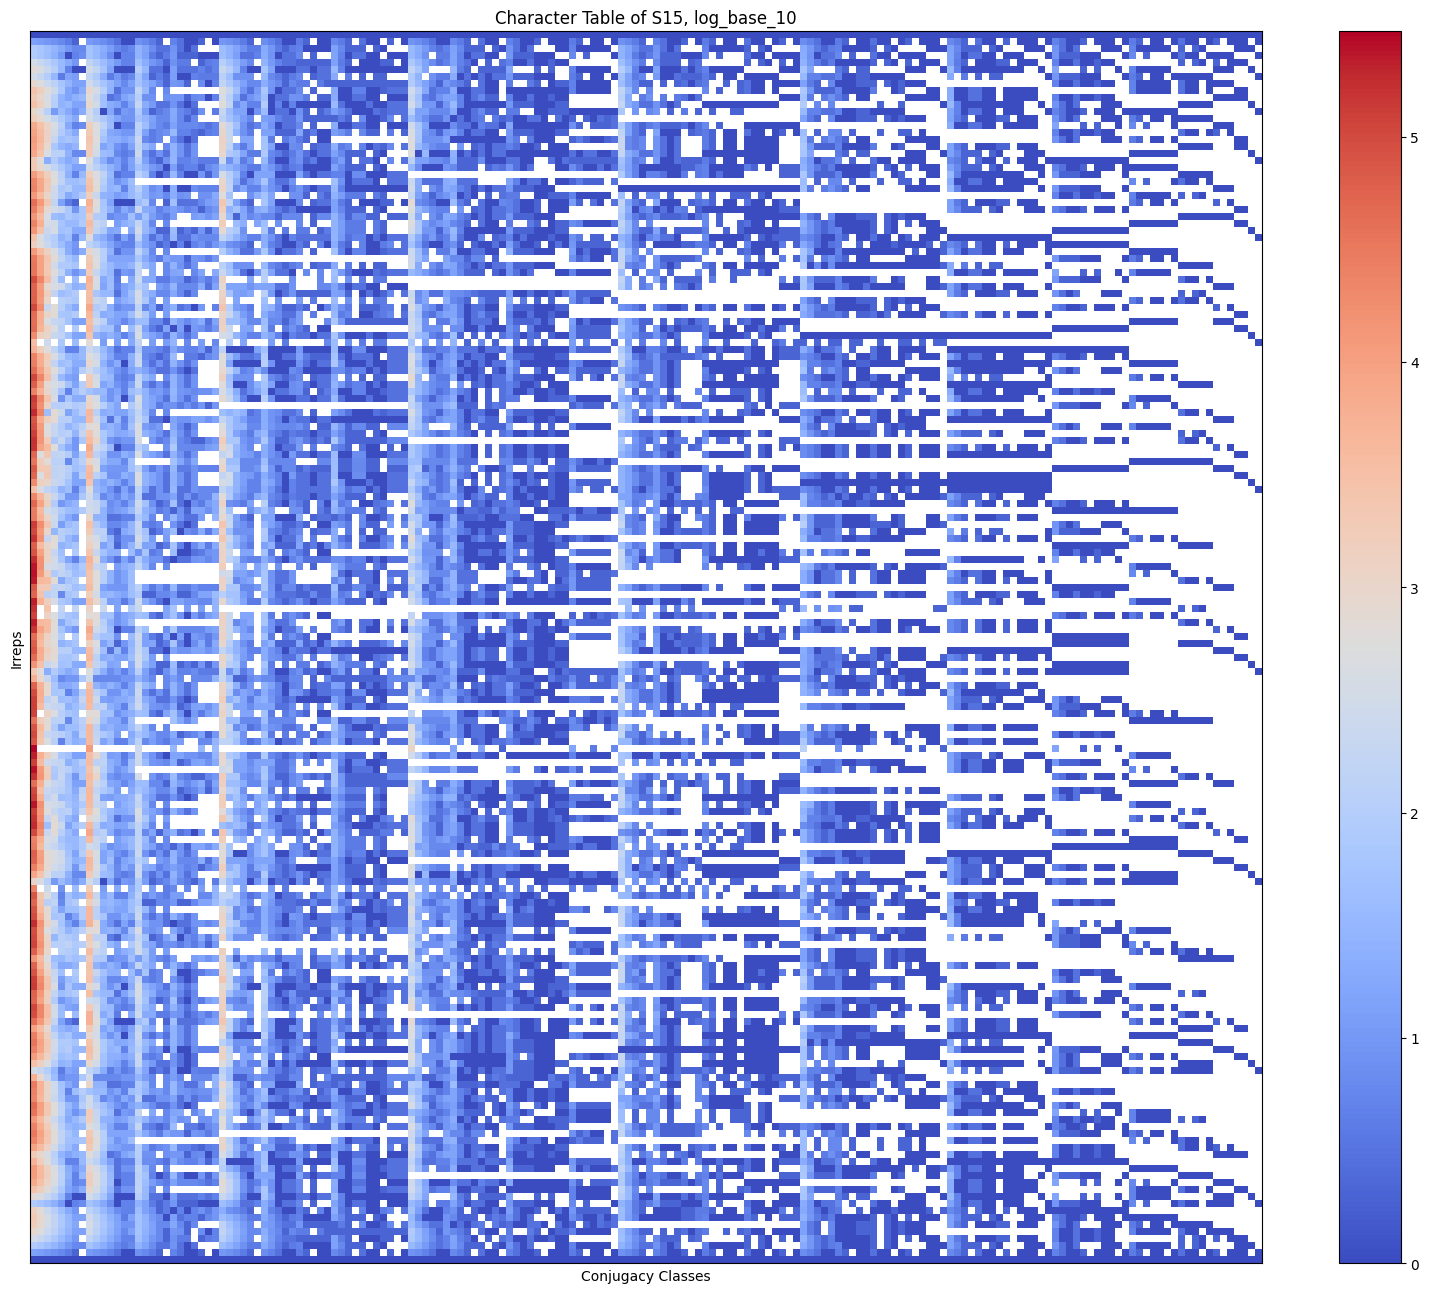

In [10]:
df = pd.read_csv("S{}.csv".format(SIZE), header=None)
# df_wo_first_column = df.iloc[1:, 1:]  # skip the first column
df_wo_first_column = df.iloc[0:, 0:]  # skip the first column
data_array = df_wo_first_column.values
print(data_array)
data_array = np.clip(df_wo_first_column.values, -THRESHOLD, THRESHOLD)
vmin, vmax = data_array.min(), data_array.max()
fig, ax = plt.subplots(figsize=(20, 16))
im = ax.imshow(data_array, cmap='coolwarm',
               interpolation='nearest', vmin=-THRESHOLD, vmax=THRESHOLD)
ax.tick_params(axis='both', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(im)
plt.xticks(range(len(df_wo_first_column.columns)), df_wo_first_column.columns)
plt.yticks(range(len(df_wo_first_column.index)), df_wo_first_column.index)
plt.xlabel('Conjugacy Classes')
plt.ylabel('Irreps')
plt.title('Chararacter Table of S{}'.format(SIZE))
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                left=False, right=False, labelbottom=False, labelleft=False)
# Show the plot
# column for triangular number
plt.show()


log_base = 10  # Change this to your desired base
# Now we try log
data_array = df_wo_first_column.values
data_array = np.log(abs(data_array)) / np.log(log_base)
vmin, vmax = data_array.min(), data_array.max()
fig, ax = plt.subplots(figsize=(20, 16))
im = ax.imshow(data_array, cmap='coolwarm',
               interpolation='nearest', vmin=0, vmax=vmax)
ax.tick_params(axis='both', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(im)
plt.xticks(range(len(df_wo_first_column.columns)), df_wo_first_column.columns)
plt.yticks(range(len(df_wo_first_column.index)), df_wo_first_column.index)
plt.xlabel('Conjugacy Classes')
plt.ylabel('Irreps')
plt.title('Character Table of S{}, log_base_{}'.format(SIZE, log_base))
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                left=False, right=False, labelbottom=False, labelleft=False)
# Show the plot
# column for triangular number
plt.show()

### Distribution of the first column

Now we focus on the first column of the character table, note that they are all positive according to the hook length formula.

In [ ]:
first_column = df.iloc[:, 1]
positions = range(len(first_column))
values = first_column.values
df2 = pd.DataFrame(values, columns=['Values'])
print(df2)
# Plot histogram with custom labels
ax = df2.plot(kind='hist', edgecolor='black', bins=500,
              linewidth=0.2, logx=True, figsize=(18, 12))
# Customize labels and title
# plt.subplots(figsize=(36, 24))
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Character Values of the first column')
# Show the plot
plt.show()

ax = df2.plot(kind='hist', edgecolor='black', bins=500,
              linewidth=0.2, figsize=(18, 12))
# Customize labels and title
# plt.subplots(figsize=(36, 24))
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Character Values of the first column')
# Show the plot
plt.show()

### The Density of Zeros in the Character Table of $S_n$
Now we study the number of zero entries in the character table of $S_n$ (it is recorded in OEIS with index [A006907](https://oeis.org/A006907)).

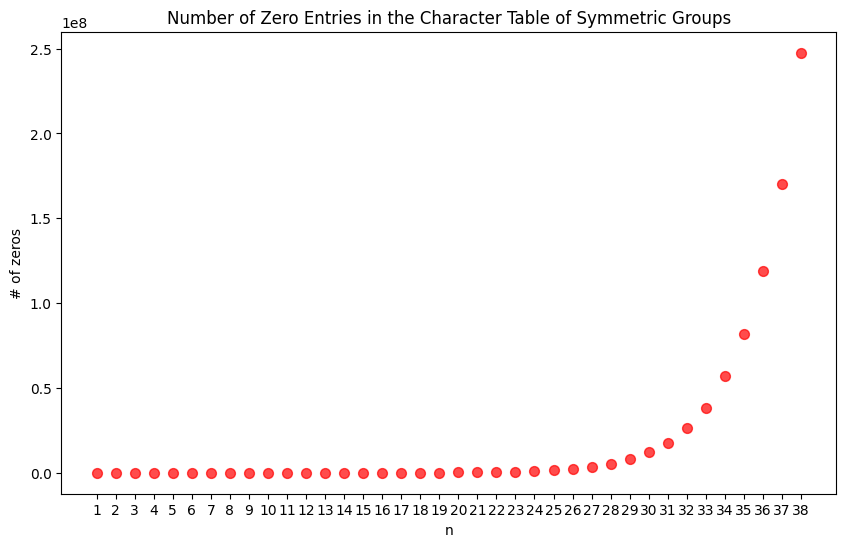

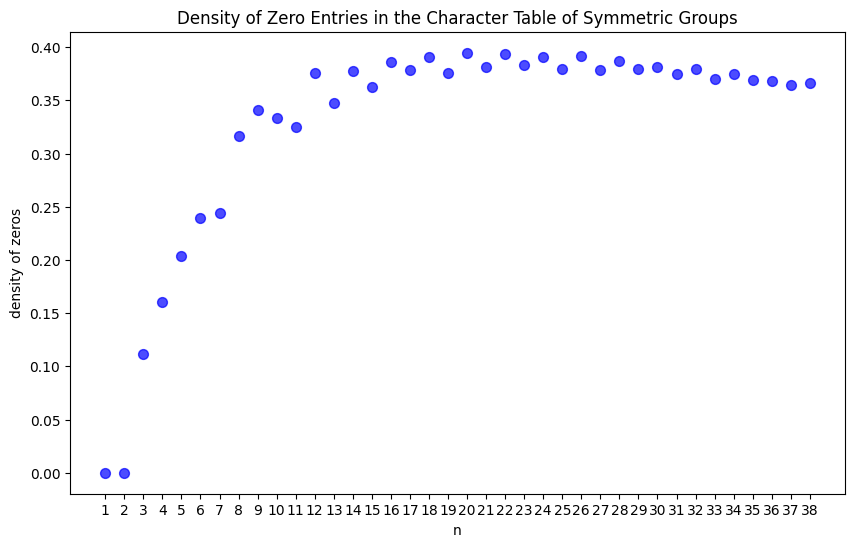

In [14]:
num_of_zeros = [0, 0, 1, 4, 10, 29, 55, 153, 307, 588, 1018, 2230, 3543, 6878,
                11216, 20615, 33355, 57980, 90194, 155176, 239327,
                395473, 604113, 970294, 1453749, 2323476, 3425849,
                5349414, 7905133, 11963861, 17521274, 26472001,
                38054619, 56756488, 81683457, 119005220, 170498286,
                247619748]

num_of_partitions = [1, 2, 3, 5, 7, 11, 15, 22, 30, 42, 56, 77, 101, 135, 176, 231,
                     297, 385, 490, 627, 792, 1002, 1255, 1575, 1958, 2436, 3010,
                     3718, 4565, 5604, 6842, 8349, 10143, 12310, 14883, 17977,
                     21637, 26015, 31185, 37338, 44583, 53174, 63261, 75175,
                     89134, 105558, 124754, 147273, 173525]

density_of_zeros = [num_of_zeros[i] /
                    (num_of_partitions[i]**2) for i in range(38)]

df = pd.DataFrame({'Values': num_of_zeros})
fig, ax = plt.subplots(figsize=(10, 6))
# ax.vlines(x=df.index, ymin=0, ymax=df['Values'],
#           color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df['Values'], color='red', s=50, alpha=0.7)
ax.set_xticks(df.index)
ax.set_xticklabels(df.index + 1)  # Assuming the data is 0-indexed
ax.set_xlabel('n')
ax.set_ylabel('# of zeros')
ax.set_title(
    'Number of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

df2 = pd.DataFrame({'Values': density_of_zeros})
fig2, ax2 = plt.subplots(figsize=(10, 6))
# ax2.vlines(x=df2.index, ymin=0,
#            ymax=df2['Values'], color='blue', alpha=0.7, linewidth=2)
ax2.scatter(x=df2.index, y=df2['Values'], color='blue', s=50, alpha=0.7)
ax2.set_xticks(df2.index)
ax2.set_xticklabels(df2.index + 1)
ax2.set_xlabel('n')
ax2.set_ylabel('density of zeros')
ax2.set_title(
    'Density of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

### Distribution of Triangular Numbers 
Files required:
- char_[N].csv

In [ ]:
triangular_numbers_index = {
    10: 19,  # 21 - 1 - 1
    15: 73,  # 75 - 1 - 1
}
N = 10
df = pd.read_csv("char_{}.csv".format(N))
first_column = df.iloc[1:, triangular_numbers_index[N]]
positions = range(len(first_column))
values = first_column.values
df2 = pd.DataFrame(values, columns=["Values"])
print(df2)
# Plot histogram with custom labels
ax = df2.plot(
    kind="hist", edgecolor="black", bins=500, linewidth=0.2, logx=True, figsize=(18, 12)
)
# Customize labels and title
# plt.subplots(figsize=(36, 24))
plt.xlabel("Values")
plt.ylabel("Count")
plt.title("Character Values of the first column")
# Show the plot
plt.show()

ax = df2.plot(kind="hist", edgecolor="black", bins=500,
              linewidth=0.2, figsize=(18, 12))
# Customize labels and title
# plt.subplots(figsize=(36, 24))
plt.xlabel("Values")
plt.ylabel("Count")
plt.title("Character Values of the first column")
# Show the plot
plt.show()

### Plotting No. and Density of Zeroes in Staircase Partitions
File required:
 - S[N]_staircase.csv

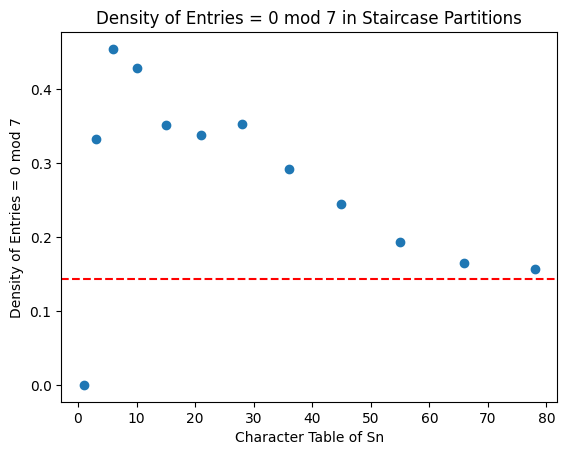

In [22]:
x_axis = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78]
n = 1
p = 7
density_of_zeroes = []
no_zeroes_list = []
mod_list = []
density_of_mod = []
for N in x_axis:
    df = pd.read_csv("S{}_staircase.csv".format(N), header=None)
    # print(df)
    no_zeroes = (df == 0).sum().sum()
    even_entries = (df % p == 0).sum().sum()
    mod_list.append(even_entries)
    density_of_mod.append(even_entries / len(df.values))
    no_zeroes_list.append(no_zeroes)
    density_of_zeroes.append(no_zeroes / len(df.values))
    n += 1

# plt.scatter(x_axis, no_zeroes_list)
# plt.xlabel("Character Table of Sn")
# plt.ylabel("No. of Zeroes")
# plt.title("No. of Zeroes in Staircase Partitions")
# plt.show()

# plt.scatter(x_axis, density_of_zeroes)
# plt.xlabel("Character Table of Sn")
# plt.ylabel("Density of Zeroes")
# plt.title("Density of Zeroes in Staircase Partitions")
# plt.show()

# plt.scatter(x_axis, mod_list)
# plt.xlabel("Character Table of Sn")
# plt.ylabel("No. of Even Entries")
# plt.title("No. of Even Entries in Staircase Partitions")
# plt.show()

plt.scatter(x_axis, density_of_mod)
plt.axhline(y=1/p, color='r', linestyle='--', label="y = 1/{}".format(p))
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Entries = 0 mod {}".format(p))
plt.title("Density of Entries = 0 mod {} in Staircase Partitions".format(p))
plt.show()

### Plotting No. and Density of Zeroes in Square Partitions
File required:
 - S[N]_staircase.csv

In [ ]:
x_axis = [1, 4, 9, 16, 25, 36, 49, 64]
n = 1
density_of_zeroes = []
no_zeroes_list = []
even_list = []
density_of_even = []
for N in x_axis:
    df = pd.read_csv("S{}_square.csv".format(N), header=None)
    no_zeroes = (df == 0).sum().sum()
    even_entries = (df % 2 == 0).sum().sum()
    even_list.append(even_entries)
    density_of_even.append(even_entries / len(df.values))
    no_zeroes_list.append(no_zeroes)
    density_of_zeroes.append(no_zeroes / len(df.values))
    n += 1

plt.scatter(x_axis, no_zeroes_list)
plt.xlabel("Character Table of Sn")
plt.ylabel("No. of Zeroes")
plt.title("No. of Zeroes in Square Partitions")
plt.show()

plt.scatter(x_axis, density_of_zeroes)
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Zeroes")
plt.title("Density of Zeroes in Square Partitions")
plt.show()

plt.scatter(x_axis, even_list)
plt.xlabel("Character Table of Sn")
plt.ylabel("No. of Even Entries")
plt.title("No. of Even Entries in Square Partitions")
plt.show()

plt.scatter(x_axis, density_of_even)
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Even Entries")
plt.title("Density of Even Entries in Square Partitions")
plt.show()